In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
import seaborn as sns

In [7]:
X = df.drop('Outcome', axis= 1).values
y = df['Outcome'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
# indepentent variable must be needs to be converted as a float tensor

# compulosory Float tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
# creating model with pytorch

class ANN_Model(nn.Module):
    def __init__(self, input_features= 8, hidden1= 20, hidden2= 20, out_features= 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x)) 
        x = self.out(x)
        return x

In [13]:
# instantiate the ANN model
torch.manual_seed(20)
model = ANN_Model()

In [14]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [15]:
###define backward propogation -- define the loss function, define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
epochs = 500
final_losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i % 6 == 1:
        print('epoch: {} ----------- loss: {}'.format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 ----------- loss: 3.4572105407714844
epoch: 7 ----------- loss: 0.7283688187599182
epoch: 13 ----------- loss: 0.6444706916809082
epoch: 19 ----------- loss: 0.6472001671791077
epoch: 25 ----------- loss: 0.6073709726333618
epoch: 31 ----------- loss: 0.5917770862579346
epoch: 37 ----------- loss: 0.5752087831497192
epoch: 43 ----------- loss: 0.5651770234107971
epoch: 49 ----------- loss: 0.5543772578239441
epoch: 55 ----------- loss: 0.5480617880821228
epoch: 61 ----------- loss: 0.5410094857215881
epoch: 67 ----------- loss: 0.5347582697868347
epoch: 73 ----------- loss: 0.5299354791641235
epoch: 79 ----------- loss: 0.5246201157569885
epoch: 85 ----------- loss: 0.5185877680778503
epoch: 91 ----------- loss: 0.5135971903800964
epoch: 97 ----------- loss: 0.5088467597961426
epoch: 103 ----------- loss: 0.5062463879585266
epoch: 109 ----------- loss: 0.5033260583877563
epoch: 115 ----------- loss: 0.4985739290714264
epoch: 121 ----------- loss: 0.49605506658554077
epoch: 127

In [17]:
## plotting the loss
import matplotlib.pyplot as plt
%matplotlib inline

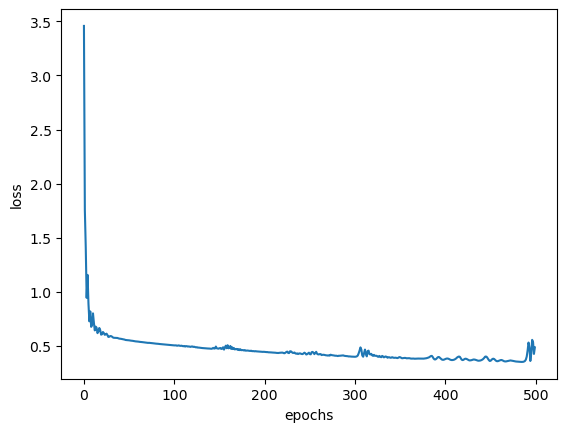

In [18]:
with torch.no_grad():
    plt.plot(range(epochs), final_losses)
    plt.ylabel('loss')
    plt.xlabel('epochs')

In [19]:
## prediction in X_test data
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
cm

array([[96, 11],
       [25, 22]], dtype=int64)

Text(95.72222222222221, 0.5, 'predicted values')

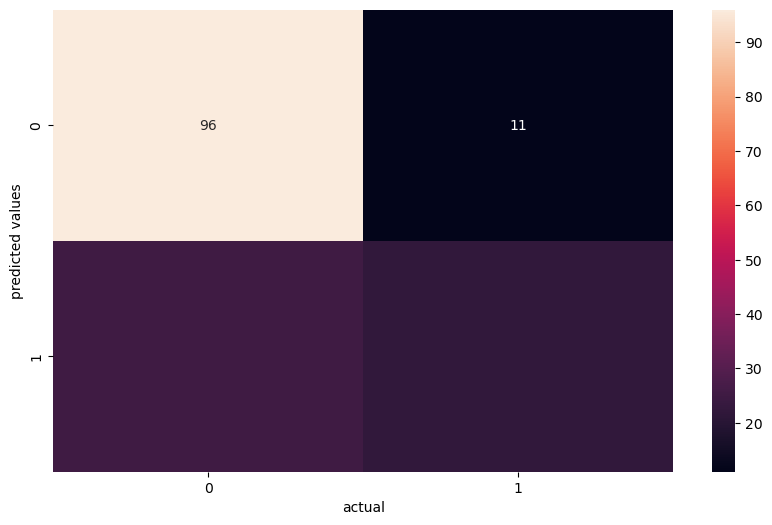

In [21]:
plt.figure(figsize= (10, 6))
sns.heatmap(cm, annot= True)
plt.xlabel('actual')
plt.ylabel('predicted values')

In [22]:
accuracy_score(y_test, predictions)

0.7662337662337663

In [23]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [24]:
torch.save(model.state_dict(), 'model_checkpoint.pth')  # Save the model

In [25]:
model = ANN_Model()  # Replace with your model class
model.load_state_dict(torch.load('model_checkpoint.pth'))  # Load your trained model
model.eval()  # Set model to evaluation mode

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

# for checking 

In [26]:
random_row = df.sample()
random_row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
543,4,84,90,23,56,39.5,0.159,25,0


In [27]:
last_column_name = df.columns[-1]
random_row_without_last = random_row.drop(last_column_name, axis=1)

# Convert to list
input_features = random_row_without_last.iloc[0].tolist()

In [28]:
new_data = torch.FloatTensor([input_features])

In [29]:
with torch.no_grad():
    predictions = model(new_data)

In [30]:
predicted_class = torch.argmax(predictions).item()  # Get the index of the highest probability
predicted_class

0

In [31]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))